In [1]:
import warnings
warnings.filterwarnings('ignore')

## Matplotlib


In [2]:
import matplotlib.pyplot as plt
import numpy as np

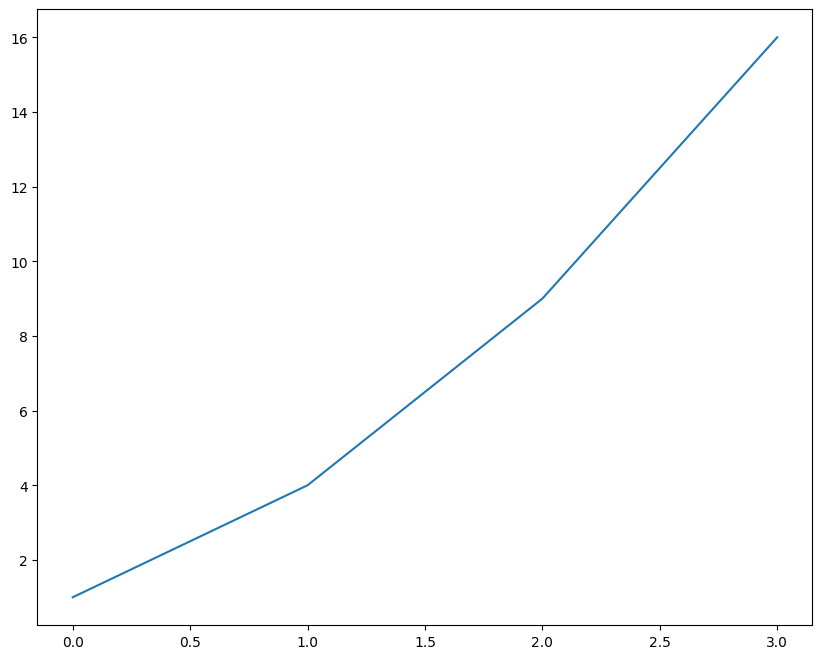

In [3]:
### Создаем наше полотно
fig = plt.figure()
### Устанавливаем размер изображения
fig.set_size_inches(10, 8)
### Если передадим в функцию plot список из чисел, то
### Нарисует нам функцию, которая изобразит линию
### Где каждому значению будет по горизонтальной оси
### Соответствовать индекс элемента
plt.plot([1, 4, 9, 16])


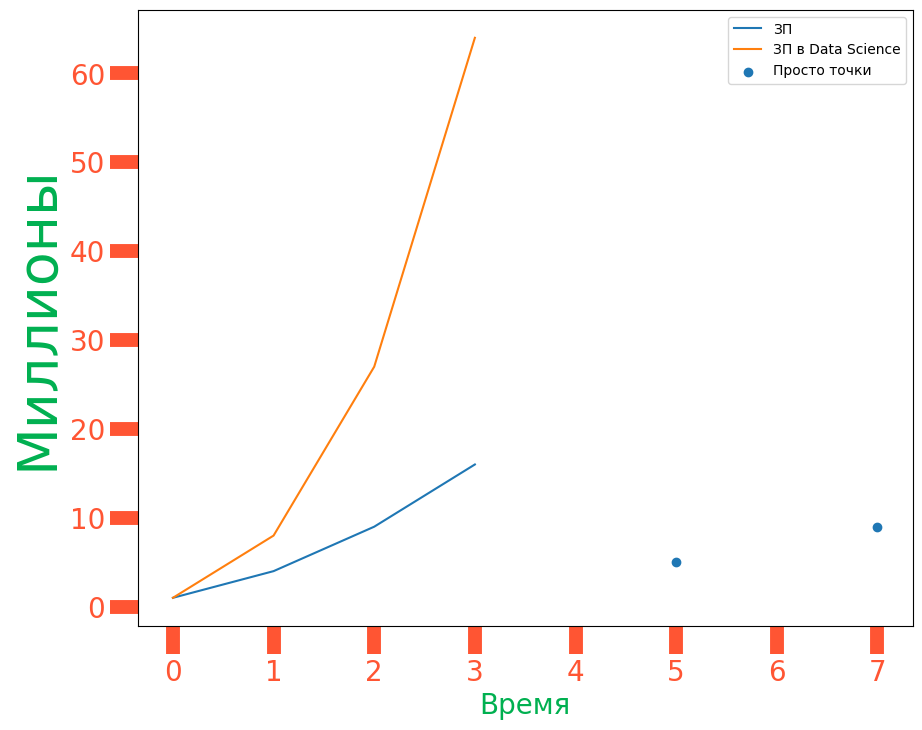

In [4]:
fig = plt.figure()
fig.set_size_inches(10, 8)

### Можно строить сразу на одном графике несколько функций
plt.plot([1, 4, 9, 16])
plt.plot([1, 8, 27, 64])
### Через функцию scatter получаем точечки
### В первом массиве - координаты по OX
### Во втором массиве - координаты по OY
plt.scatter([5, 7], [5, 9])

plt.xlabel('Время', fontsize=20, color='#00B050')
plt.ylabel('Миллионы', fontsize=40, color='#00B050')


### Можно так же указать и их цвета и размеры


### У тиков тоже!

plt.tick_params(colors='#FF5533', labelsize=20,
                length=20, width=10)


### Ну и легенду!
plt.legend(['ЗП', 'ЗП в Data Science', 'Просто точки'])

plt.show()

In [5]:
### Может быть лень постоянно прописывать
### У графиков параметры цвета, размера, шрифта
### Можно положить их в словарь дефолтных настроек

import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 5
mlp.rcParams['xtick.major.size'] = 20
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 20
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 20
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 20
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'


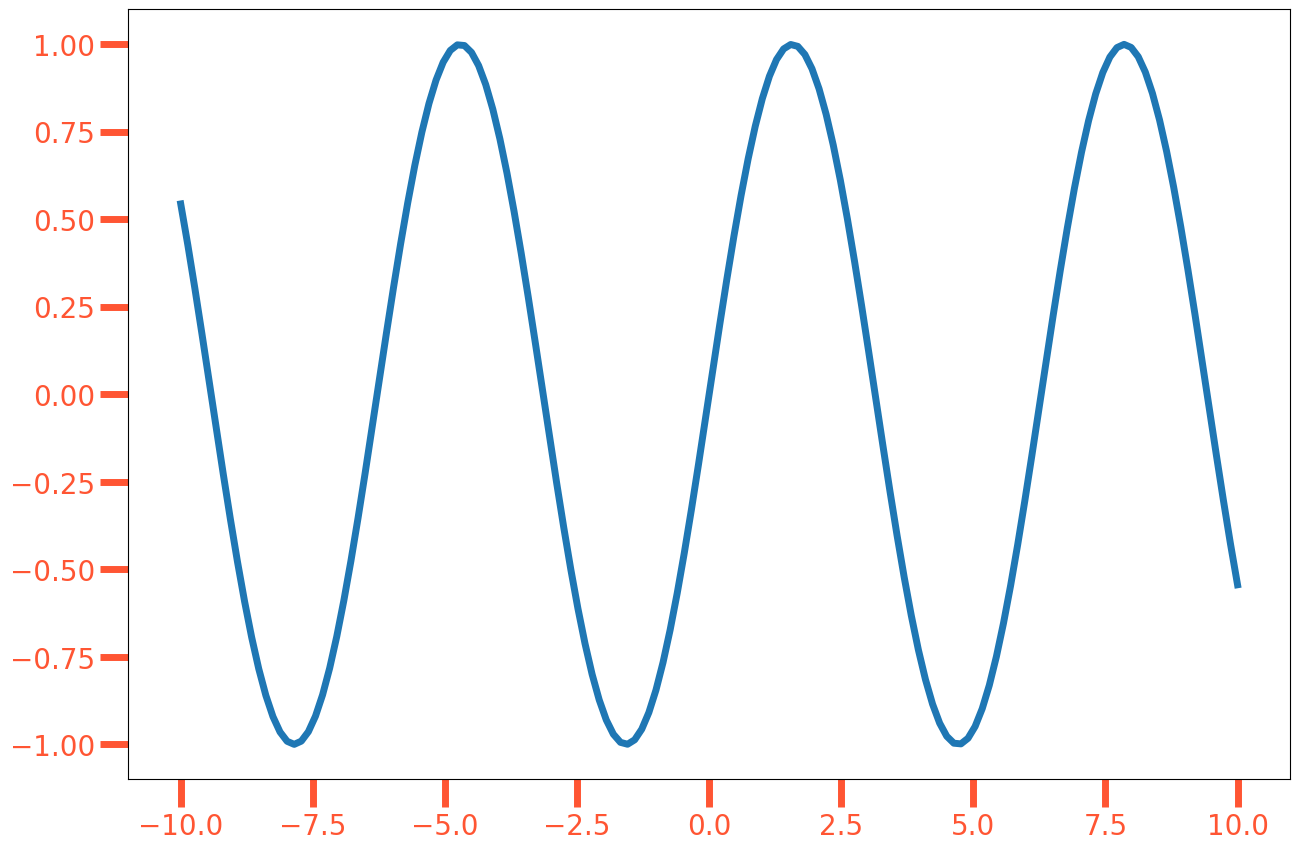

In [6]:
### Нарисуем синус!
fig = plt.figure()

fig.set_size_inches(15, 10)

x = np.linspace(-10, 10, 150)
y = np.sin(x)

plt.plot(x, y)

plt.show()

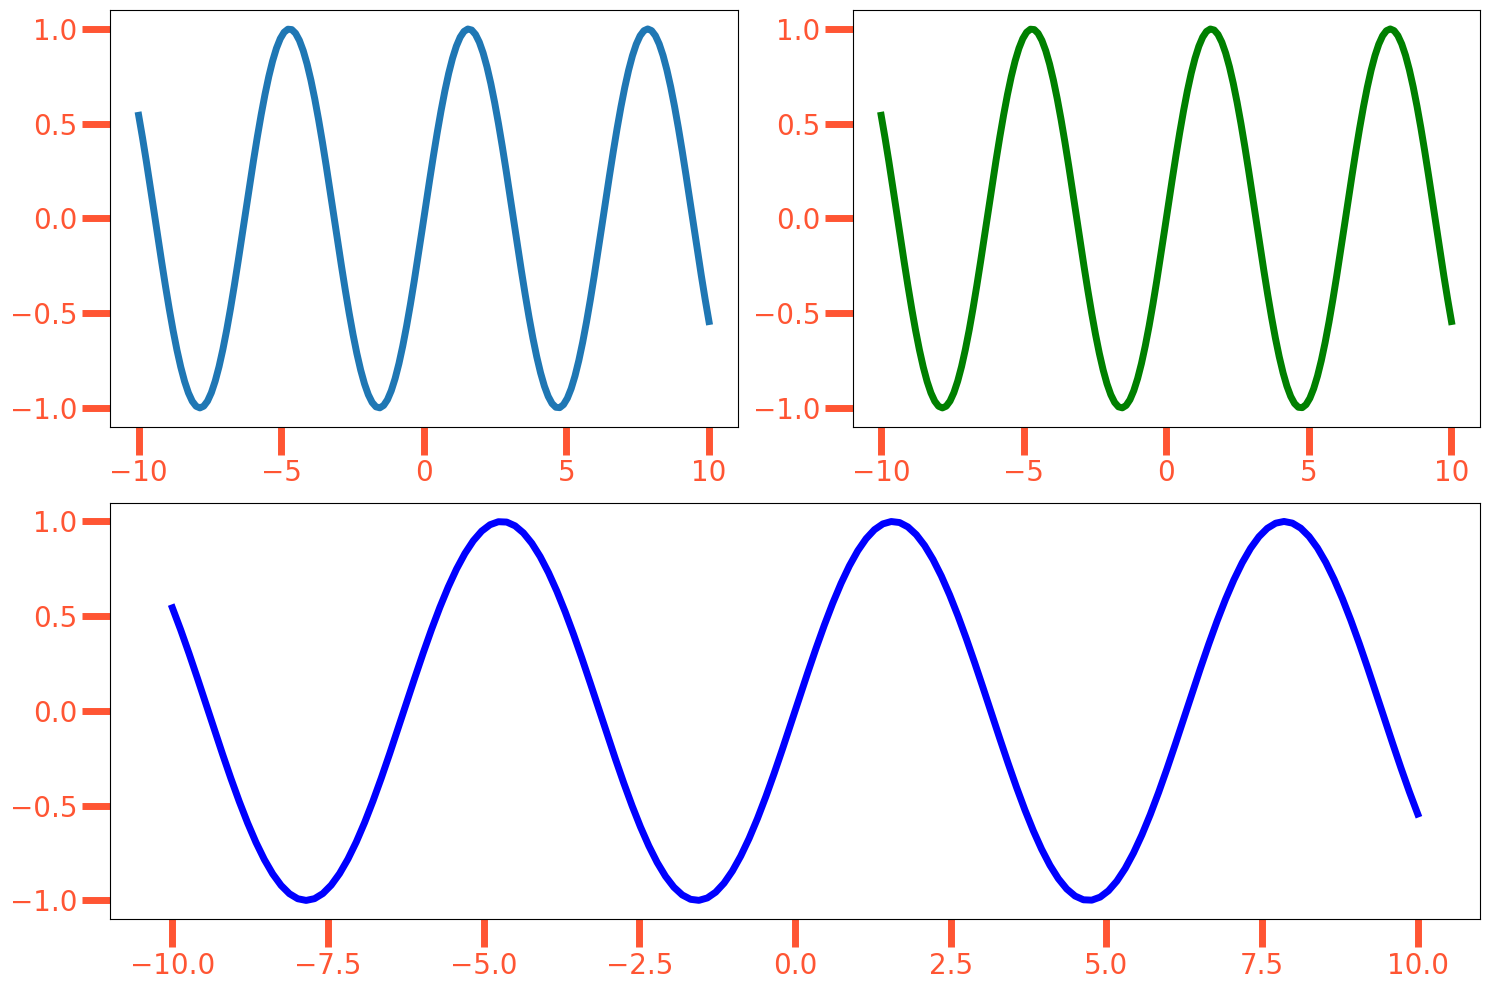

In [7]:
### Нарисуем несколько графиков сразу!

fig = plt.figure()

fig.set_size_inches(15, 10)

x = np.linspace(-10, 10, 150)
y = np.sin(x)

### Создадим первый график на нашем полотне
ax1 = fig.add_subplot(2, 2, 1)

plt.plot(x, y)
### Создадим второй график на нашем полотне
ax2 = fig.add_subplot(2, 2, 2)

plt.plot(x, y, color='green')
### Создадим третий график на нашем полотне
ax3 = fig.add_subplot(2, 1, 2)

plt.plot(x, y, color='blue')
### Сделаем поприличнее расстояние между графиками
fig.tight_layout()

### Установим у графиков названия разные

plt.show()

## Градиентный спуск: функция одной переменной

In [8]:
### Пусть есть функция!
def func(x):
    return x**3 - 6*x**2 - 15*x +10

In [9]:
x = np.linspace(-5, 10, 150)

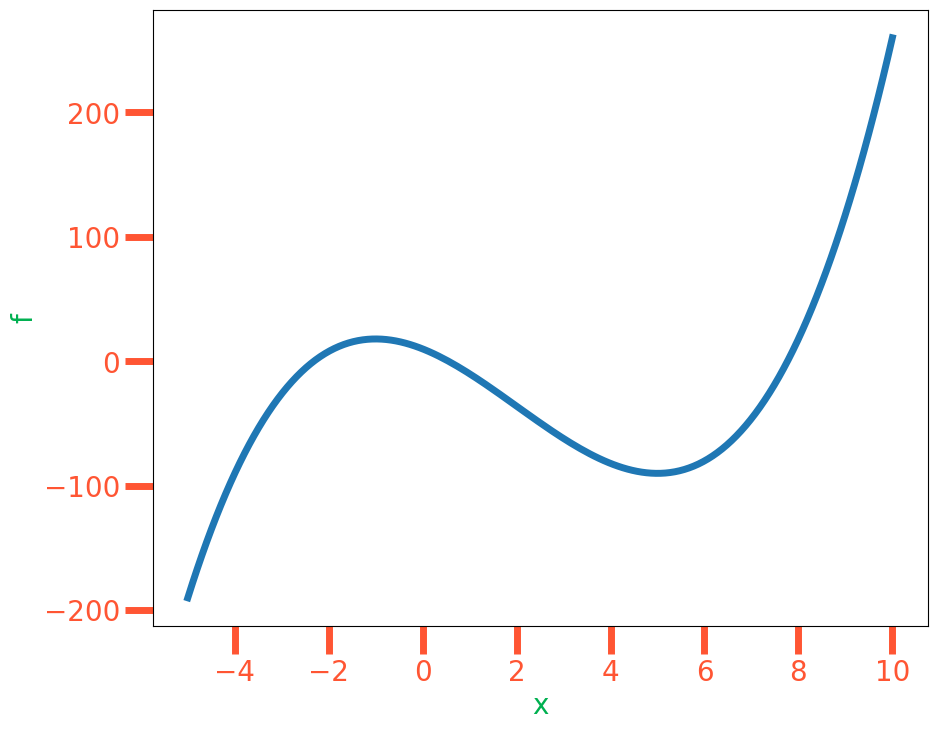

In [10]:
fig = plt.figure()

fig.set_size_inches(10, 8)

plt.plot(x, func(x))

plt.ylabel('f')
plt.xlabel('x')

plt.show()

In [11]:
def func_derivative(x):
    return 3 * x**2 - 12 * x - 15

In [12]:
### Создадим функцию, которая делает и визуализирует 
### Градиентный спуск

def descent_and_plot(X_start=10, learning_rate=0.01, threshold=0.0001):
    X_start = X_start
    learning_rate = learning_rate
    threshold = threshold
    
    X_next = X_start - learning_rate * func_derivative(X_start)
    
    fig = plt.figure()
    fig.set_size_inches(10, 8)
    
    plt.plot(x, func(x), alpha=0.5)
    
    plt.scatter([X_start, X_next],
                [func(X_start), func(X_next)],
                color='green',
                s=80)
    
    plt.plot([X_start, X_next],
                [func(X_start), func(X_next)],
                color='red')
    
    plt.ylabel('f')
    plt.xlabel('x')
    
    
    while abs(X_start - X_next) > threshold:
        X_start = X_next
        
        X_next = X_start - learning_rate * func_derivative(X_start)
        
        plt.scatter([X_start, X_next],
                [func(X_start), func(X_next)],
                color='green',
                s=80)
    
        plt.plot([X_start, X_next],
                    [func(X_start), func(X_next)],
                    color='red')
    
    print(f'Найденная точка в конце градиентного спуска это X={X_next}')

Найденная точка в конце градиентного спуска это X=5.000382502344409


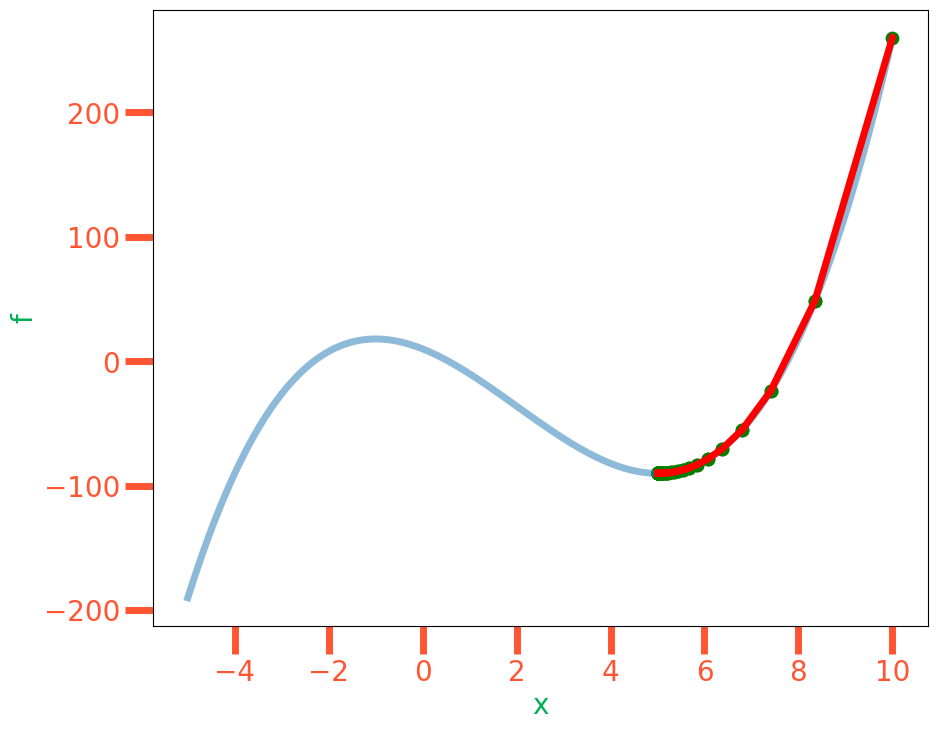

In [13]:
descent_and_plot()

Найденная точка в конце градиентного спуска это X=5.000382502344409


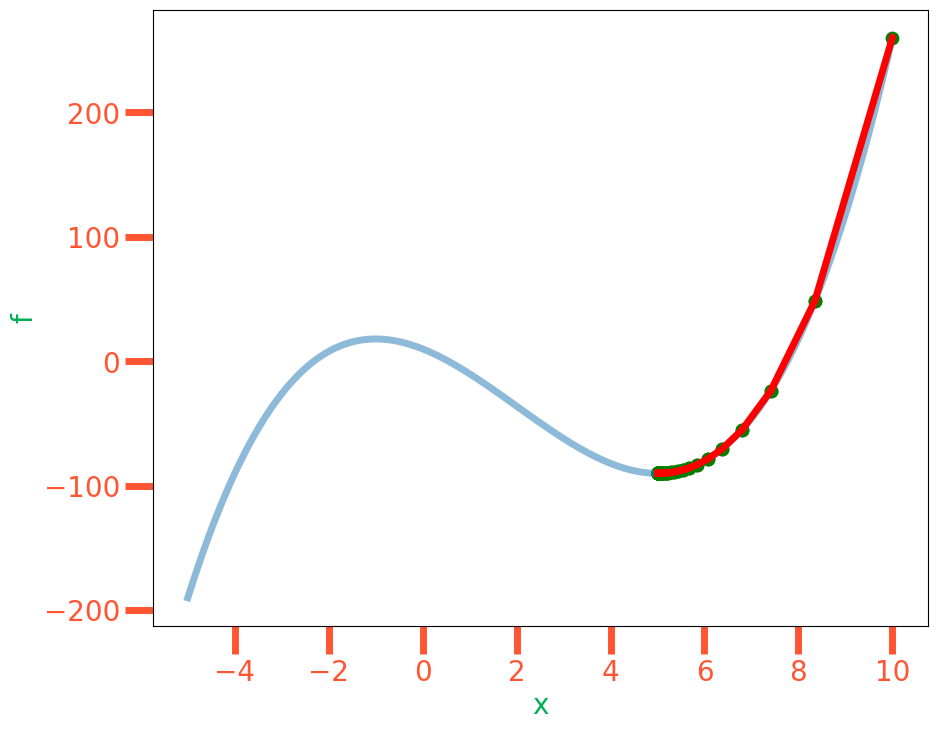

In [14]:
descent_and_plot(10, 0.01, 0.0001)

Найденная точка в конце градиентного спуска это X=8.504805472225721


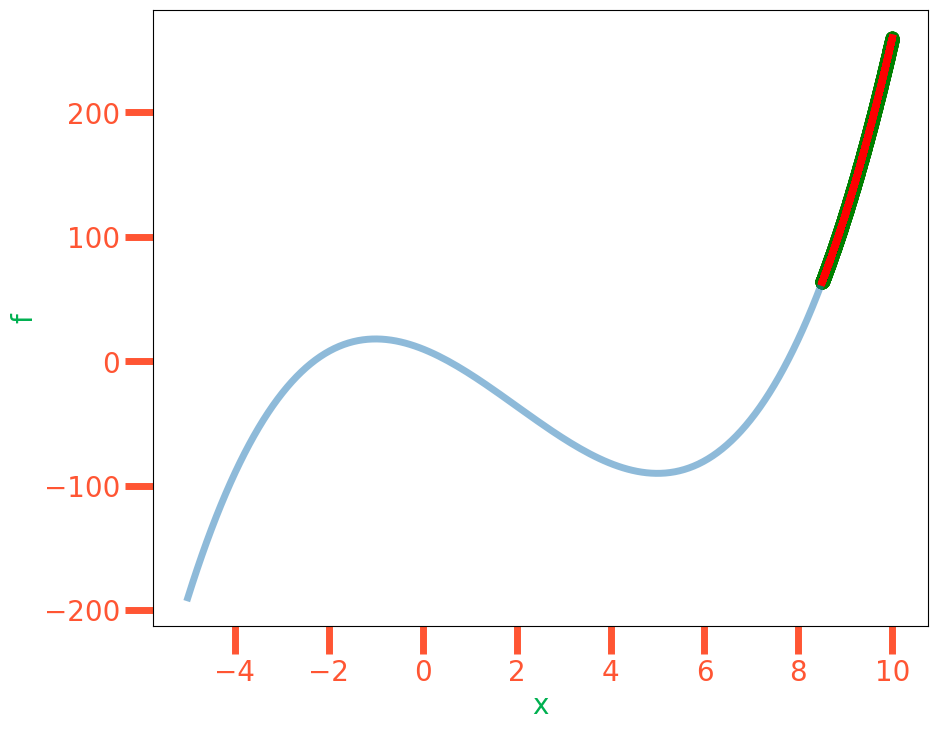

In [15]:
descent_and_plot(10, 0.00001, 0.001)

Найденная точка в конце градиентного спуска это X=-1.0


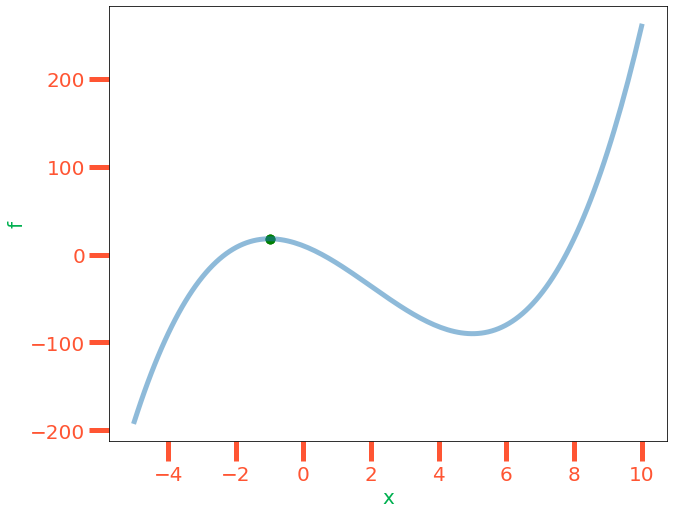

In [68]:
descent_and_plot(-1, 0.01, 0.0001)

OverflowError: (34, 'Result too large')

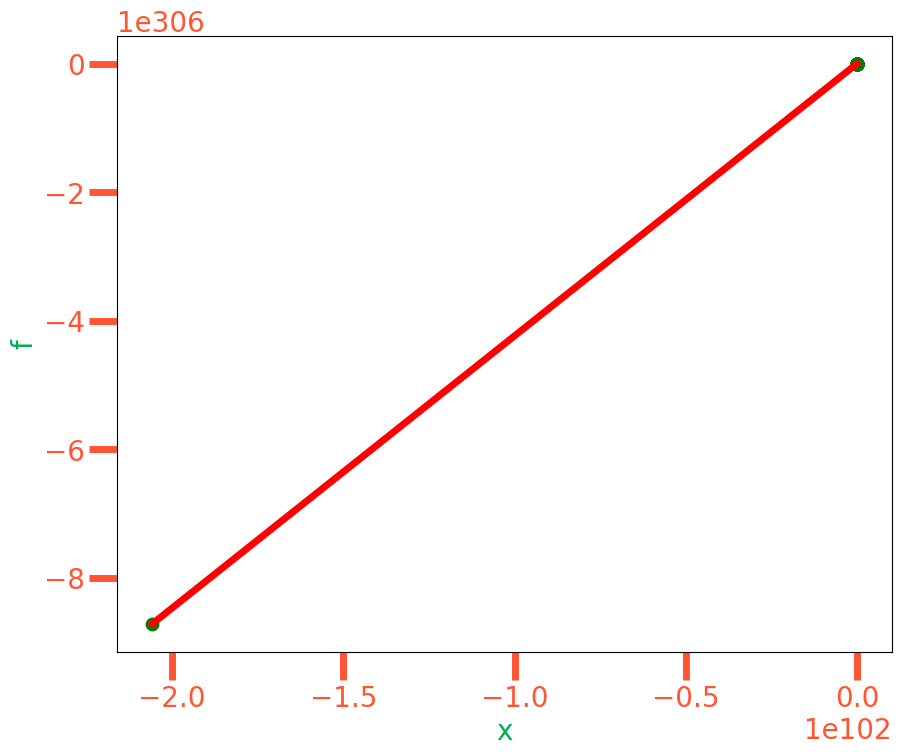

In [16]:
descent_and_plot(-2, 0.01, 0.0001)

## Градиентный спуск: OLS регрессия


<div>
<img src="Рисунок8.png" width="700"/>
</div>


Инициализируем случайную точку (часто берут просто нули):

$$
\beta_0 = (0\;\; 0 ...)
$$

Итеративно скачем по линиям уровня нашей функции, шагая каждый раз в сторону антиградиента с корректировкой шага $\eta_k$:

$$
\beta_{k+1} = \beta_k - \eta_{k}\cdot\nabla Q(\beta_k, X)
$$
 
Останавливаемся, когда срабатывает критерий останова. Например:

$$
|\beta_{k+1} - \beta_k| < \xi
$$

Пусть имеем 3 объекта $(X, Y)^i$ = $\left((d_i, 1), Y_i \right)$ с 3 признаками $d_1$, $d_2$ (+ константа). Хотим оценить обычную линейную модель:

$$
a(x) = \beta_1 \cdot d_1 + \beta_2 \cdot d_2 + \beta_0
$$

Тогда функционал ошибки как среднеквадратическая ошибка на нашей выборке выглядит следующим образом:

$$
Q(a, X) = \frac{1}{N}\cdot\sum_{i=1}^N (\beta_1 \cdot d_{i1} + \beta_2 \cdot d_{i2} + \beta_0 - y_i)^2
$$

Посчитаем вектор-градиент по всем оцениваемым параметрам:

$$
\nabla Q(a, X) = (Q'_{\beta_1} \;\;\; Q'_{\beta_2} \;\;\; Q'_{\beta_0})
$$

Пример расчета производной по параметру у признака номер 1:

$$
Q'_{\beta_1} = \frac{2}{N} \cdot \sum_{i=1}^N d_{i1} \cdot (\beta_1 \cdot d_{i1} + \beta_2 \cdot d_{i2} + \beta_0 - y_i)
$$


In [41]:
X = np.array([[23, 0.5, 1],
              [35, 1, 1],
              [18, 0, 1]])

Y = np.array([55, 100, 45])

### Хотим найти оптимальные коэффициенты
### (5, -30, -45)